# 0.4.0 The Cox PH Model

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import lifelines

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../") 

import utils.paths as path
from utils.paths2 import direcciones

## 0.4.2 Model prison data with Cox PH

In [4]:
prison = pd.read_csv(path.data_raw_dir("prison.csv"), sep=',')
prison = prison.loc[:,['week','arrest','fin','age','wexp','mar','paro','prio']]
print(prison.info())
prison.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   week    432 non-null    int64
 1   arrest  432 non-null    int64
 2   fin     432 non-null    int64
 3   age     432 non-null    int64
 4   wexp    432 non-null    int64
 5   mar     432 non-null    int64
 6   paro    432 non-null    int64
 7   prio    432 non-null    int64
dtypes: int64(8)
memory usage: 27.1 KB
None


,week,arrest,fin,age,wexp,mar,paro,prio
0,20,1,0,27,0,0,1,3
1,17,1,0,18,0,0,1,8
2,25,1,0,19,1,0,1,13
3,52,0,1,23,1,1,1,1
4,52,0,0,19,1,0,1,3


In [5]:
# Import CoxPHFitter class
from lifelines import CoxPHFitter

# Instantiate CoxPHFitter class cph
cph = CoxPHFitter()

In [6]:
cph.fit(df=prison, duration_col='week', event_col='arrest')
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
fin,-0.365536,0.693825,0.190900,-0.739693,0.008621,0.477260,1.008659,0.0,-1.914802,0.055518,4.170907
age,-0.056326,0.945231,0.021887,-0.099223,-0.013428,0.905541,0.986662,0.0,-2.573486,0.010068,6.634085
wexp,-0.156989,0.854714,0.212081,-0.572660,0.258682,0.564023,1.295222,0.0,-0.740230,0.459161,1.122930
mar,-0.471303,0.624189,0.380268,-1.216615,0.274009,0.296231,1.315227,0.0,-1.239395,0.215199,2.216256
paro,-0.077919,0.925039,0.195299,-0.460698,0.304861,0.630843,1.356436,0.0,-0.398971,0.689914,0.535511
prio,0.089662,1.093805,0.028711,0.033389,0.145935,1.033953,1.157121,0.0,3.122894,0.001791,9.125163


age, and prio < 0.05. This means there is a strong correlation between the changes in age and prio and the hazards.

## 0.4.3 Custom Cox PH model

In [7]:
# Instantiate CoxPHFitter class cph
custom_cph = CoxPHFitter()

In [8]:
custom_cph.fit(df=prison, duration_col="week", event_col="arrest",
               formula="fin + age + prio")
custom_cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age,-0.067105,0.935097,0.020851,-0.107972,-0.026239,0.897653,0.974102,0.0,-3.218397,0.001289,9.599426
fin,-0.346954,0.706838,0.190247,-0.719832,0.025923,0.486834,1.026262,0.0,-1.823703,0.068197,3.874147
prio,0.096893,1.101743,0.027253,0.043478,0.150309,1.044437,1.162193,0.0,3.555273,0.000378,11.370906


## 0.4.5 Cox PH model survival time

In [9]:
# Instantiate CoxPHFitter class cph
cph = CoxPHFitter()

In [10]:
cph.fit(df=prison, duration_col='week', event_col='arrest')
summary_df = cph.summary

In [11]:
summary_df["surv_ratio"] = 1 / (summary_df.loc[:,'exp(coef)'])
summary_df

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p),surv_ratio
covariate,,,,,,,,,,,,
fin,-0.365536,0.693825,0.190900,-0.739693,0.008621,0.477260,1.008659,0.0,-1.914802,0.055518,4.170907,1.441286
age,-0.056326,0.945231,0.021887,-0.099223,-0.013428,0.905541,0.986662,0.0,-2.573486,0.010068,6.634085,1.057942
wexp,-0.156989,0.854714,0.212081,-0.572660,0.258682,0.564023,1.295222,0.0,-0.740230,0.459161,1.122930,1.169982
mar,-0.471303,0.624189,0.380268,-1.216615,0.274009,0.296231,1.315227,0.0,-1.239395,0.215199,2.216256,1.602080
paro,-0.077919,0.925039,0.195299,-0.460698,0.304861,0.630843,1.356436,0.0,-0.398971,0.689914,0.535511,1.081035
prio,0.089662,1.093805,0.028711,0.033389,0.145935,1.033953,1.157121,0.0,3.122894,0.001791,9.125163,0.914240


In [12]:
print(summary_df.loc['prio', "surv_ratio"])

0.9142399599880768


In [13]:
Survival_time_interpretation = (summary_df.loc['prio', "surv_ratio"] - 1)*100; Survival_time_interpretation

-8.576004001192317

**Question**
Based on the column you just created, what is the impact on time-to-arrest with a one-unit increase in prio?

R:/   The survival time interpretation of the Cox PH model coefficients is intuitive and comparable to how we interpret the Weibull AFT model coefficients.

Time-to-arrest decreases by 8.6%.

## 0.4.6 Plot covariate effects on survival

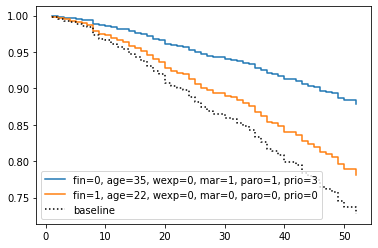

In [14]:
# Plot partial effects
cph.plot_partial_effects_on_outcome(covariates=["fin", "age", "wexp", "mar", "paro", "prio"],
                                    values=[[0, 35, 0, 1, 1, 3],
                                            [1, 22, 0, 0, 0, 0]])

# Show plot
plt.show()

Marie is more likely to be arrested sooner because her survival probabilities are lower than those of Jack's.

## 0.4.8 Test the PH assumption with KM curves

In [16]:
kmf = lifelines.KaplanMeierFitter()
# Fit to fin == 0
kmf.fit(durations=prison[prison["fin"] == 0]["week"], event_observed=prison[prison["fin"] == 0]["arrest"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 216 total observations, 150 right-censored observations>

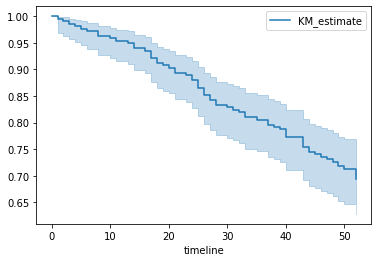

In [17]:
# Plot survival curve for fin == 0
ax = kmf.plot()

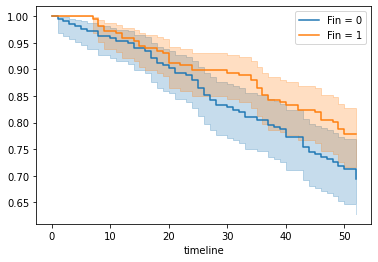

In [18]:
ax = plt.subplot(111)

# Fit to fin == 0
kmf.fit(durations=prison[prison["fin"] == 0]["week"], event_observed=prison[prison["fin"] == 0]["arrest"], 
        label='Fin = 0')

# Plot survival curve for fin == 0
ax = kmf.plot()

# Fit to fin == 1 and plot on ax
kmf.fit(durations=prison[prison["fin"] == 1]["week"], event_observed=prison[prison["fin"] == 1]["arrest"], 
        label='Fin = 1')
ax = kmf.plot(ax=ax)
plt.show()

**Question**
Based on the plotted Kaplan-Meier curves, does the covariate fin satisfy the proportional hazards assumption?

R:/ Despite being a visual and seemingly relaxed check, Kaplan-Meier curves that seem parallel indicate the proportional hazards assumption is satisfied.

## 0.4.9 Test the PH assumption automatically


In [19]:
# Instantiate CoxPHFitter class cph
cph = CoxPHFitter()

In [20]:
cph.fit(df=prison, duration_col='week', event_col='arrest')

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

In [21]:
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
fin,-0.365536,0.693825,0.190900,-0.739693,0.008621,0.477260,1.008659,0.0,-1.914802,0.055518,4.170907
age,-0.056326,0.945231,0.021887,-0.099223,-0.013428,0.905541,0.986662,0.0,-2.573486,0.010068,6.634085
wexp,-0.156989,0.854714,0.212081,-0.572660,0.258682,0.564023,1.295222,0.0,-0.740230,0.459161,1.122930
mar,-0.471303,0.624189,0.380268,-1.216615,0.274009,0.296231,1.315227,0.0,-1.239395,0.215199,2.216256
paro,-0.077919,0.925039,0.195299,-0.460698,0.304861,0.630843,1.356436,0.0,-0.398971,0.689914,0.535511
prio,0.089662,1.093805,0.028711,0.033389,0.145935,1.033953,1.157121,0.0,3.122894,0.001791,9.125163


In [22]:
print(cph.check_assumptions(training_df=prison, p_value_threshold=0.1))

The ``p_value_threshold`` is set at 0.1. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
         test_name = proportional_hazard_test

---
           test_statistic      p  -log2(p)
age  km             11.51 <0.005     10.50
     rank           11.93 <0.005     10.83
fin  km              0.00   0.95      0.08
     rank            0.00   0.96      0.06
mar  km              0.78   0.38      1.41
     rank            0.90   0.34      1.54
paro km              0.16   0.69      0.54
     rank            0.18   0.67      0.58
prio km              0.02   0.89      0.16
     rank            0.01   0.90      0.15
wexp km              7.86   0.01      7.63
     rank            7.70   0.01      7.50



1. Variable 'age' failed the non-proportional test: p-value is 0.0006.

   Advice 1: the functional form of the variable 'age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'age' using pd.cut, and then specify it in `strata=['age',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'wexp' failed the non-proportional test: p-value is 0.0050.

   Advice: with so few unique values (only 2), you can include `strata=['wexp', ...]` in the call in
`.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/lat

## 0.4.10 Employee churn study

In [23]:
employes = pd.read_csv(path.data_raw_dir("employes.csv"), sep=',')
print(employes.info())
employes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   attrition                  1470 non-null   int64
 1   years_at_company           1470 non-null   int64
 2   environment_satisfaction   1470 non-null   int64
 3   job_satisfaction           1470 non-null   int64
 4   relationship_satisfaction  1470 non-null   int64
 5   work_life_balance          1470 non-null   int64
 6   distance_from_home         1470 non-null   int64
 7   performance_rating         1470 non-null   int64
 8   hourly_rate                1470 non-null   int64
 9   stock_option_level         1470 non-null   int64
dtypes: int64(10)
memory usage: 115.0 KB
None


,attrition,years_at_company,environment_satisfaction,job_satisfaction,relationship_satisfaction,work_life_balance,distance_from_home,performance_rating,hourly_rate,stock_option_level
0,1,6,2,4,1,1,1,3,94,0
1,0,10,3,2,4,3,8,4,61,1
2,1,0,4,3,2,3,2,3,92,0
3,0,8,4,3,3,3,3,3,56,0
4,0,2,1,2,4,3,2,3,40,1


In [24]:
# Instantiate CoxPHFitter class cph
cph = CoxPHFitter()

In [25]:
cph.fit(df=employes, duration_col='years_at_company', event_col='attrition')
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
environment_satisfaction,-0.220229,0.802335,0.058937,-0.335743,-0.104715,0.714807,0.900581,0.0,-3.736702,1.864498e-04,12.388926
job_satisfaction,-0.216685,0.805183,0.058229,-0.330813,-0.102558,0.718340,0.902526,0.0,-3.721232,1.982530e-04,12.300370
relationship_satisfaction,-0.117581,0.889069,0.058499,-0.232237,-0.002925,0.792758,0.997079,0.0,-2.009964,4.443497e-02,4.492161
work_life_balance,-0.201180,0.817765,0.088503,-0.374643,-0.027718,0.687535,0.972663,0.0,-2.273146,2.301738e-02,5.441133
distance_from_home,0.021806,1.022046,0.007511,0.007086,0.036527,1.007111,1.037202,0.0,2.903395,3.691405e-03,8.081614
performance_rating,0.011028,1.011089,0.180096,-0.341953,0.364009,0.710381,1.439087,0.0,0.061233,9.511734e-01,0.072220
hourly_rate,-0.000924,0.999076,0.003232,-0.007259,0.005410,0.992768,1.005424,0.0,-0.286031,7.748548e-01,0.368002
stock_option_level,-0.504880,0.603578,0.096841,-0.694685,-0.315075,0.499232,0.729734,0.0,-5.213503,1.853076e-07,22.363574


In [26]:
# attrition indicates if the employee has churned (1 if churn, 0 otherwise).

# Select employees that have not churned
current_employees = employes.loc[employes['attrition'] == 0]
current_employees.head()

,attrition,years_at_company,environment_satisfaction,job_satisfaction,relationship_satisfaction,work_life_balance,distance_from_home,performance_rating,hourly_rate,stock_option_level
1,0,10,3,2,4,3,8,4,61,1
3,0,8,4,3,3,3,3,3,56,0
4,0,2,1,2,4,3,2,3,40,1
5,0,7,4,4,3,2,2,3,79,0
6,0,1,3,1,1,2,3,4,81,3


In [27]:
# Existing durations of employees that have not churned
current_employees_last_obs = current_employees['years_at_company']
current_employees_last_obs.head()

1    10
3     8
4     2
5     7
6     1
Name: years_at_company, dtype: int64

## 0.4.11 Predict before they leave!

In [28]:
current_employees.shape

(1233, 10)

In [29]:
# Predict survival function conditional on existing durations
cph.predict_survival_function(current_employees, conditional_after=current_employees_last_obs)

1         3         4         5         6         7         8     \
0.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1.0   0.994379  0.986798  0.983461  0.988179  0.989854  0.983189  0.937988   
2.0   0.994379  0.951911  0.965986  0.975871  0.981564  0.969540  0.927955   
3.0   0.987684  0.946173  0.944570  0.943300  0.972731  0.955078  0.927955   
4.0   0.980120  0.946173  0.932884  0.937936  0.961795  0.937295  0.916073   
5.0   0.976035  0.939342  0.917089  0.937936  0.955777  0.927565  0.902735   
6.0   0.971381  0.931628  0.902392  0.931549  0.947582  0.914381  0.895570   
7.0   0.966321  0.927463  0.887155  0.924332  0.939894  0.902082  0.887442   
8.0   0.960901  0.922721  0.847169  0.920435  0.931858  0.889296  0.878643   
9.0   0.954958  0.917566  0.840631  0.915995  0.910437  0.855571  0.869265   
10.0  0.948339  0.912047  0.840631  0.911168  0.906887  0.850033  0.859038   
11.0  0.938797  0.905998  0.832863  0.905999  0.906887  0.850033  0.847714   
12.0  0.926159  0.899264  0.824109  0.900331  0.902651  0.843443  0.831515   
13.0  0.909867  0.889562  0.819392  0.894018  0.897854  0.836005  0.810291   
14.0  0.892952  0.876724  0.814027  0.884918  0.895259  0.831992  0.783316   
15.0  0.892952  0.860192  0.808205  0.872869  0.892299  0.827423  0.755768   
16.0  0.892952  0.843050  0.801981  0.857338  0.889075  0.822459  0.755768   
17.0  0.892952  0.843050  0.795172  0.841216  0.885616  0.817147  0.755768   
18.0  0.892952  0.843050  0.787607  0.841216  0.881817  0.811327  0.755768   
19.0  0.892952  0.843050  0.776735  0.841216  0.877576  0.804851  0.755768   
20.0  0.892952  0.843050  0.762401  0.841216  0.871447  0.795528  0.755768   
21.0  0.848902  0.843050  0.744030  0.841216  0.863300  0.783203  0.755768   
22.0  0.797677  0.843050  0.725085  0.841216  0.852747  0.767351  0.686236   
23.0  0.735332  0.798522  0.725085  0.841216  0.841728  0.750938  0.609405   
24.0  0.735332  0.746954  0.725085  0.799248  0.841728  0.750938  0.521769   
25.0  0.735332  0.684515  0.725085  0.750478  0.841728  0.750938  0.521769   
26.0  0.735332  0.684515  0.725085  0.691168  0.841728  0.750938  0.521769   
27.0  0.735332  0.684515  0.725085  0.691168  0.841728  0.750938  0.521769   
29.0  0.334487  0.684515  0.676383  0.691168  0.841728  0.750938  0.246121   
30.0  0.225594  0.448651  0.620931  0.691168  0.812728  0.708421  0.116097   
31.0  0.225594  0.294058  0.555223  0.464031  0.778417  0.659401  0.054764   
32.0  0.225594  0.192734  0.555223  0.311537  0.735729  0.600384  0.054764   
33.0  0.225594  0.192734  0.555223  0.209157  0.735729  0.600384  0.054764   
34.0  0.225594  0.192734  0.555223  0.209157  0.735729  0.600384  0.054764   
36.0  0.225594  0.192734  0.323129  0.209157  0.735729  0.600384  0.054764   
37.0  0.225594  0.192734  0.188055  0.209157  0.559980  0.381379  0.054764   
40.0  0.225594  0.192734  0.109444  0.209157  0.324400  0.153891  0.054764   

          9         10        11        12        13        15        16    \
0.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1.0   0.987251  0.981922  0.959021  0.979357  0.986630  0.987076  0.987116   
2.0   0.973990  0.957653  0.952304  0.951731  0.972456  0.987076  0.975080   
3.0   0.938961  0.935246  0.952304  0.926313  0.955018  0.971809  0.962552   
4.0   0.933201  0.912196  0.944316  0.900257  0.945470  0.954721  0.929425   
5.0   0.933201  0.852580  0.935307  0.833308  0.932529  0.945563  0.923973   
6.0   0.926346  0.842954  0.930448  0.822560  0.920448  0.935192  0.923973   
7.0   0.918605  0.842954  0.924920  0.822560  0.907884  0.923989  0.917482   
8.0   0.914426  0.831563  0.918916  0.809863  0.874711  0.912074  0.910150   
9.0   0.909669  0.818785  0.912494  0.795650  0.869259  0.899110  0.906191   
10.0  0.904497  0.811926  0.905462  0.788034  0.869259  0.884794  0.901682   
11.0  0.898962  0.804148  0.897644  0.779408  0.862769  0.864385  0.896780   
12.0  0.892895  0.795732  0.886

In [30]:
# Predict median remaining times for current employees
pred = cph.predict_median(current_employees, conditional_after=current_employees_last_obs)
pred

1       29.0
3       30.0
4       36.0
5       31.0
6       40.0
7       37.0
8       29.0
9       31.0
10      29.0
11      29.0
12      27.0
13      36.0
15      23.0
16      32.0
17      40.0
18      13.0
19      36.0
20      34.0
22      21.0
23      40.0
25      25.0
27      29.0
28      17.0
29      29.0
30      37.0
31      36.0
32      29.0
35       inf
37      36.0
38      37.0
39      33.0
40      40.0
41      37.0
43      29.0
44      27.0
46      24.0
47      19.0
48      29.0
49      37.0
52      29.0
53      34.0
54      36.0
55      23.0
56      24.0
57      31.0
58      32.0
59      31.0
60      29.0
61      29.0
62      11.0
63      11.0
64       inf
65       inf
66      26.0
67      32.0
68      36.0
70      29.0
71      34.0
72      32.0
73      29.0
74      32.0
75      27.0
76      23.0
77      33.0
78      27.0
79      34.0
80       inf
81      27.0
82      37.0
83       inf
84      27.0
85      32.0
86      40.0
87       inf
88       inf
90      17.0
91      29.0

In [31]:
print(min(pred))

2.0


In [32]:
summary_df = cph.summary
summary_df["surv_ratio"] = 1 / (summary_df.loc[:,'exp(coef)'])
summary_df

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p),surv_ratio
covariate,,,,,,,,,,,,
environment_satisfaction,-0.220229,0.802335,0.058937,-0.335743,-0.104715,0.714807,0.900581,0.0,-3.736702,1.864498e-04,12.388926,1.246362
job_satisfaction,-0.216685,0.805183,0.058229,-0.330813,-0.102558,0.718340,0.902526,0.0,-3.721232,1.982530e-04,12.300370,1.241953
relationship_satisfaction,-0.117581,0.889069,0.058499,-0.232237,-0.002925,0.792758,0.997079,0.0,-2.009964,4.443497e-02,4.492161,1.124773
work_life_balance,-0.201180,0.817765,0.088503,-0.374643,-0.027718,0.687535,0.972663,0.0,-2.273146,2.301738e-02,5.441133,1.222845
distance_from_home,0.021806,1.022046,0.007511,0.007086,0.036527,1.007111,1.037202,0.0,2.903395,3.691405e-03,8.081614,0.978430
performance_rating,0.011028,1.011089,0.180096,-0.341953,0.364009,0.710381,1.439087,0.0,0.061233,9.511734e-01,0.072220,0.989033
hourly_rate,-0.000924,0.999076,0.003232,-0.007259,0.005410,0.992768,1.005424,0.0,-0.286031,7.748548e-01,0.368002,1.000925
stock_option_level,-0.504880,0.603578,0.096841,-0.694685,-0.315075,0.499232,0.729734,0.0,-5.213503,1.853076e-07,22.363574,1.656787


In [33]:
Survival_time_interpretation_v1 = (1- summary_df.loc['environment_satisfaction', "exp(coef)"])*100
Survival_time_interpretation_v1

19.766503222909527

In [34]:
Survival_time_interpretation_v2 = (1- summary_df.loc['job_satisfaction', "exp(coef)"])*100
Survival_time_interpretation_v2

19.481658072660014

In [35]:
Survival_time_interpretation_v3 = (1 - summary_df.loc['relationship_satisfaction', "exp(coef)"])*100
Survival_time_interpretation_v3

11.093140336439832

In [36]:
Survival_time_interpretation_v4 = (1- summary_df.loc['work_life_balance', "exp(coef)"])*100
Survival_time_interpretation_v4

18.223496133400264

In [37]:
Survival_time_interpretation_v5 = (1 - summary_df.loc['distance_from_home', "exp(coef)"])*100
Survival_time_interpretation_v5

-2.2045737794337272

In [38]:
Survival_time_interpretation_v6 = (1 - summary_df.loc['performance_rating', "exp(coef)"])*100
Survival_time_interpretation_v6

-1.108889341334196

In [39]:
Survival_time_interpretation_v7 = (1 - summary_df.loc['hourly_rate', "exp(coef)"])*100
Survival_time_interpretation_v7

0.09239643950106347

In [40]:
Survival_time_interpretation_v8 = (1 - summary_df.loc['stock_option_level', "exp(coef)"])*100
Survival_time_interpretation_v8

39.64220449442926

In [41]:
Survival = Survival_time_interpretation_v1 + Survival_time_interpretation_v2 + Survival_time_interpretation_v3 + Survival_time_interpretation_v4 + Survival_time_interpretation_v5 + Survival_time_interpretation_v6 + Survival_time_interpretation_v7 + Survival_time_interpretation_v8
Survival

104.98593557857203

In [42]:
print('ok_')

ok_
